In [1]:
include("../EuclidElements.jl");

# Book 1

## Proposition 1

On a given finite straight line to construct an equilateral triangle.

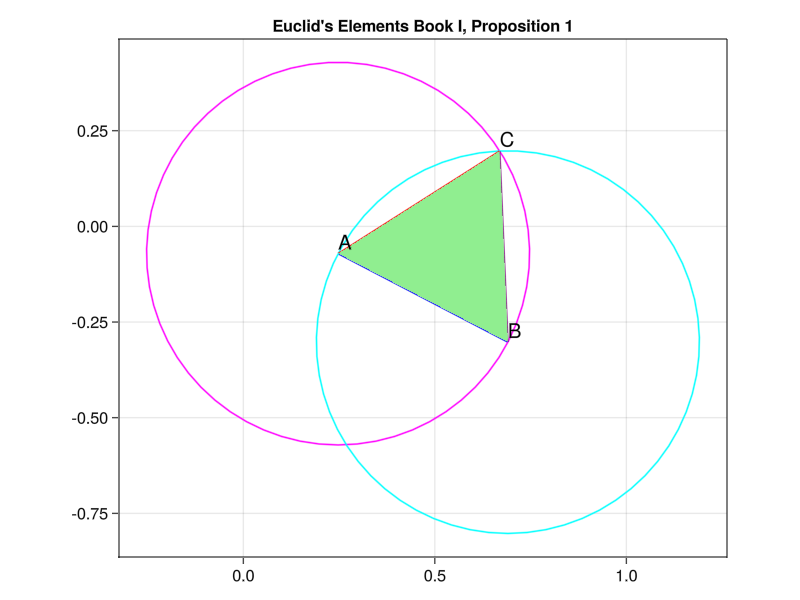

In [2]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 1")

#note: we will draw the point labels at the end for clarity, but they will be defined earlier

# Let AB be the given finite straight line
A = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
B = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
AB = lines!([A,B], color=:blue)

# Thus it is required to construct an equilateral triangle on the straight line AB.
# With center A and distance AB let the circle BCD be described; [Post. 3]
r = norm(B-A)
BCD = lines!(Circle(A, r), color=:magenta)

# again, with centre B and distance BA let the circle ACE be described; [Post. 3]
ACE = lines!(Circle(B, r), color=:cyan)

# and from the point C, in which the circles cut one another, 
# to the points A, B let the straight lines CA, CB be joined [Post. 1]
#           ASIDE: this is unit circle 60° * r because equilateral triangles have 3 60° angles
v = B-A
θ = (π/3) + sign(v[2])*(acos((v[1])/r))
C_x, C_y = [r*cos(θ), r*sin(θ)]+A
C = Point2f(C_x, C_y)
CA = lines!([A, C], color=:red)
CB = lines!([B, C], color=:purple)

# Now, since the point A is the centre of the circle CDB, AC is equal to AB. [Def. 15]
# Again, since the point B is the ccentre of the circle CAE, BC is equal to BA. [Def. 15]

# But CA was also proved equal to AB; therefore each of the straight lines CA, CB is equal to AB.

# And things which are equal to the same thing are also equal to one another; [C.N. 1]
#   therefore CA is also equal to CB.

# Therefore the three straight lines CA, AB, BC are equal to one another.
# Therefore the triangle ABC is equilateral; and it has been constructed on the given finite straight line AB.
poly!([A, B, C], color=:lightgreen)


# Being what it was required to do.


# draw the point labels
text!(A, text="A")
text!(B, text="B")
text!(C, text="C")

#Draw and show the chart :)
current_figure()

### Animation

In [5]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 1")
xlims!(ax, -0.5,1.75)
ylims!(ax, -1,0.75)

#note: we will draw the point labels at the end for clarity, but they will be defined earlier

# Let AB be the given finite straight line
#           ASIDE : Will use same points defined above -- uncomment this definition if new points are needed
#A = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
#B = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
AB = lines!([A,B], color=:blue)

# Thus it is required to construct an equilateral triangle on the straight line AB.
# With center A and distance AB let the circle BCD be described; [Post. 3]
r = norm(B-A)
startθ1 = vector_angle(A, B)
BCD = whole_circle(A, r, startθ1, color=:pink, linewidth=5f0)

# again, with centre B and distance BA let the circle ACE be described; [Post. 3]
startθ2 = vector_angle(B, A)
ACE = whole_circle(B, r, startθ2, color=:pink, linewidth=5f0)

# and from the point C, in which the circles cut one another, 
# to the points A, B let the straight lines CA, CB be joined [Post. 1]
#           ASIDE: this is unit circle 60° * r because equilateral triangles have 3 60° angles
θ = (π/3) + startθ1
C_x, C_y = [r*cos(θ), r*sin(θ)]+A
C = Point2f(C_x, C_y)
CA = straight_line(C, A, color=:pink, linewidth=5f0, cursorwidth=0.02f0)
CB = straight_line(C, B, color=:pink, linewidth=5f0, cursorwidth=0.02f0)

# Now, since the point A is the centre of the circle CDB, AC is equal to AB. [Def. 15]
AC_AB = compare_lines(A, C, A, B, Point2f0(1, 0), π/2f0, precision=5, cursorcolor=:pink, color=:pink, linewidth=5f0, cursorlinewidth=0.5f0)

# Again, since the point B is the ccentre of the circle CAE, BC is equal to BA. [Def. 15]
BC_BA = compare_lines(B, C, B, A, Point2f0(1.25, 0), π/2f0, precision=5, cursorcolor=:pink, color=:pink, linewidth=5f0, cursorlinewidth=0.5f0)

# But CA was also proved equal to AB; therefore each of the straight lines CA, CB is equal to AB.
BC_AC = compare_lines(B, C, A, C, Point2f0(1.5, 0), π/2f0, precision=5, cursorcolor=:pink, color=:pink, linewidth=5f0, cursorlinewidth=0.5f0)

# And things which are equal to the same thing are also equal to one another; [C.N. 1]
#   therefore CA is also equal to CB.

# Therefore the three straight lines CA, AB, BC are equal to one another.
# Therefore the triangle ABC is equilateral; and it has been constructed on the given finite straight line AB.
triangleAlpha = Observable(0f0)
poly!([A, C, B], color=@lift(RGBA(0.0, 0.8, 0.0, $triangleAlpha)))


# Being what it was required to do.


# draw the point labels
text!(A, text="A")
text!(B, text="B")
CAlpha = Observable(0f0)
text!(C, text="C", color=@lift(RGBA(0, 0, 0, $CAlpha)))


# Draw the animation!
framerate = 24
d_s = 24
t_rots = 5.5π
timestamps = range(0,t_rots, step=t_rots/(d_s*framerate))

record(f, "gifs/Euclid-I-01.01.gif", timestamps; framerate=framerate) do t
    # d(n, ofn) is a function generating partitions of time to animate items in
    d(n, ofn=5.5f0) = 0.5f0π + (n-1)*(2.5f0π - 0.5f0)/ofn

    # animate the circles and lines according to their appropriate time partitions
    animate_circle(BCD, d(1), d(2), t, fade_start=3π, fade_end=3.5π)
    animate_circle(ACE, d(2), d(3), t, fade_start=3π, fade_end=3.5π)
    animate_line(CA, d(3.5), d(4.5), t, fade_start=3π, fade_end=3.5π)
    animate_line(CB, d(4.5), d(5.5), t, fade_start=3π, fade_end=3.5π)

    # animate the line comparisons
    animate_linecompare(AC_AB, 2.5f0π, 3f0π, t, fade_start=4.5f0π, fade_end=5f0π)
    animate_linecompare(BC_BA, 3f0π, 3.5f0π, t, fade_start=4.5f0π, fade_end=5f0π)
    animate_linecompare(BC_AC, 3.5f0π, 4f0π, t, fade_start=4.5f0π, fade_end=5f0π)

    # Animate showing C
    if t > d(3) && t <= d(3.5f0)
        CAlpha[] = t - d(3)
    elseif t > d(3.5f0)
        CAlpha[] = 1
    end

    # Animate the filled equilateral triangle appearing
    if t > 2.5π && t <= 3.5π
        showTri = t - 2.5π
        triangleAlpha[] = showTri
    elseif t > 3.5π
        triangleAlpha[] = 1
    end
end;

![animation](gifs/Euclid-I-01.01.gif)

#### Using Reusable Animations

In [6]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 1")
xlims!(ax, -0.5,1.75)
ylims!(ax, -1,0.75)

#note: we will draw the point labels at the end for clarity, but they will be defined earlier

# Let AB be the given finite straight line
#           ASIDE : Will use same points defined above -- uncomment this definition if new points are needed
#A = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
#B = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
AB = lines!([A,B], color=:blue)


# Draw the equilateral triangle
triangle = equilateral_triangle(A, B, color=:pink, linewidth=5f0, cursorlw=0.02f0)
C = Point(triangle)

# Now, since the point A is the centre of the circle CDB, AC is equal to AB. [Def. 15]
AC_AB = compare_lines(A, C, A, B, Point2f0(1, 0), π/2f0, precision=5, cursorcolor=:pink, color=:pink, linewidth=5f0, cursorlinewidth=0.5f0)

# Again, since the point B is the ccentre of the circle CAE, BC is equal to BA. [Def. 15]
BC_BA = compare_lines(B, C, B, A, Point2f0(1.25, 0), π/2f0, precision=5, cursorcolor=:pink, color=:pink, linewidth=5f0, cursorlinewidth=0.5f0)

# But CA was also proved equal to AB; therefore each of the straight lines CA, CB is equal to AB.
BC_AC = compare_lines(B, C, A, C, Point2f0(1.5, 0), π/2f0, precision=5, cursorcolor=:pink, color=:pink, linewidth=5f0, cursorlinewidth=0.5f0)

# And things which are equal to the same thing are also equal to one another; [C.N. 1]
#   therefore CA is also equal to CB.

# Therefore the three straight lines CA, AB, BC are equal to one another.
# Therefore the triangle ABC is equilateral; and it has been constructed on the given finite straight line AB.
triangleAlpha = Observable(0f0)
poly!([A, C, B], color=@lift(RGBA(0.0, 0.8, 0.0, $triangleAlpha)))


# Being what it was required to do.


# draw the point labels
text!(A, text="A")
text!(B, text="B")
CAlpha = Observable(0f0)
text!(C, text="C", color=@lift(RGBA(0, 0, 0, $CAlpha)))


# Draw the animation!
framerate = 24
d_s = 24
t_rots = 5.5π
timestamps = range(0,t_rots, step=t_rots/(d_s*framerate))

record(f, "gifs/Euclid-I-01.02.gif", timestamps; framerate=framerate) do t
    # animate the equilateral triangle
    animate_equilateral(triangle, 0.5f0π, 2.5f0π, t, fade_start=3f0π, fade_end=3.5f0π)

    # animate the line comparisons
    animate_linecompare(AC_AB, 2.5f0π, 3f0π, t, fade_start=4.5f0π, fade_end=5f0π)
    animate_linecompare(BC_BA, 3f0π, 3.5f0π, t, fade_start=4.5f0π, fade_end=5f0π)
    animate_linecompare(BC_AC, 3.5f0π, 4f0π, t, fade_start=4.5f0π, fade_end=5f0π)

    # Animate showing C
    if t > 2π && t <= 2.5π
        CAlpha[] = t - 2π
    elseif t > 2.5π
        CAlpha[] = 1
    end

    # Animate the filled equilateral triangle appearing
    if t > 2.5π && t <= 3.5π
        showTri = t - 2.5π
        triangleAlpha[] = showTri
    elseif t > 3.5π
        triangleAlpha[] = 1
    end

    # Animate the filled equilateral triangle appearing
    if t > 2.5π && t <= 3.5π
        showTri = t - 2.5π
        triangleAlpha[] = showTri
    end
end;

![animation](gifs/Euclid-I-01.02.gif)